<a href="https://colab.research.google.com/github/AmnaShahid999/AmnaShahid999.github.io/blob/master/Dummies_df_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/df_dummies.csv')
df.head()

,sex_dummy,race_dummy,born_dummy,parborn_dummy,disblty_dummy,gender1_dummy,relig_dummy,relig16_dummy,health_dummy,age__25-34,...,college_segment_Less Than High School,college_segment_No Formal Schooling,college_segment_Some College,happy_encoded,income,rincome,physhlth,mntlhlth,year,cohort
0,0,1,0,0,0,0,0,0,0,False,...,False,False,False,3.0,NaN,NaN,NaN,NaN,1972,1949.0
1,1,1,0,0,0,0,0,0,0,False,...,True,False,False,3.0,NaN,NaN,NaN,NaN,1972,1902.0
2,0,1,0,0,0,0,0,0,1,False,...,True,False,False,2.0,NaN,NaN,NaN,NaN,1972,1924.0
3,0,1,0,0,0,0,0,0,0,True,...,False,False,False,3.0,NaN,NaN,NaN,NaN,1972,1945.0
4,0,1,0,0,0,0,0,0,0,False,...,True,False,False,2.0,NaN,NaN,NaN,NaN,1972,1911.0


###Encoding physical and mental health

In [ ]:
# Ensure 'physhlth' and 'mntlhlth' columns are numeric and replace NaN with -1
df['physhlth'] = pd.to_numeric(df['physhlth'], errors='coerce')
#df['physhlth'] = df['physhlth'].fillna(-1).astype(int)  # Replace NaN with -1

df['mntlhlth'] = pd.to_numeric(df['mntlhlth'], errors='coerce')
#df['mntlhlth'] = df['mntlhlth'].fillna(-1).astype(int)  # Replace NaN with -1


def encode_health(value):
    #if value == -1:  # Condition for missing values
        #return -1
    if value == 0:
        return 0  # Your original encoding for 0
    elif 1 <= value <= 5:
        return 1
    elif 6 <= value <= 10:
        return 2
    elif 11 <= value <= 15:
        return 3
    elif 16 <= value <= 20:
        return 4
    elif 21 <= value <= 25:
        return 5
    elif 26 <= value <= 31:
        return 6
    else:
        return np.nan  # Use np.nan for unclassified values (outside 0-31)

# Apply the function to create the encoded columns
df['physhlth_encoded'] = df['physhlth'].apply(encode_health)
df['mntlhlth_encoded'] = df['mntlhlth'].apply(encode_health)

# Display value counts of the encoded columns
print(df['physhlth_encoded'].value_counts(dropna=False))
print(df['mntlhlth_encoded'].value_counts(dropna=False))

physhlth_encoded
NaN    55806
0.0     5313
1.0     2062
2.0      442
6.0      262
3.0      192
4.0       80
5.0       44
Name: count, dtype: int64
mntlhlth_encoded
NaN    52123
0.0     6514
1.0     3324
2.0      861
3.0      508
6.0      500
4.0      271
5.0      100
Name: count, dtype: int64


In [ ]:
income_mapping = {
    '$25,000 or more': 13,
    '$20,000 to $24,999': 12,
    '$15,000 to $19,999': 11,
    '$10,000 to $14,999': 10,
    '$8,000 to $9,999': 9,
    '$7,000 to $7,999': 8,
    '$6,000 to $6,999': 7,
    '$5,000 to $5,999': 6,
    '$4,000 to $4,999': 5,
    '$3,000 to $3,999': 4,
    '$1,000 to $2,999': 3,
    'Under $1,000': 1
}

rincome_mapping = {
    '$25000 OR MORE': 12,
    '$20000 - 24999': 11,
    '$15000 - 19999': 10,
    '$10000 - 14999': 9,
    '$8000 TO 9999': 8,
    '$7000 TO 7999': 7,
    '$6000 TO 6999': 6,
    '$5000 TO 5999': 5,
    '$4000 TO 4999': 4,
    '$3000 TO 3999': 3,
    '$1000 TO 2999': 2,
    'LT $1000': 1  # Changed from 0 to 1
}

df['rincome_encoded'] = df['rincome'].map(rincome_mapping)
df['income_encoded'] = df['income'].map(income_mapping)

In [ ]:
#value counts rincome_encoded and income_encoded
print(df['rincome_encoded'].value_counts(dropna=False))
print(df['income_encoded'].value_counts(dropna=False))

rincome_encoded
NaN     23159
12.0    17851
9.0      5005
11.0     4014
10.0     3948
2.0      1814
8.0      1783
1.0      1266
3.0      1233
5.0      1087
4.0      1052
6.0      1000
7.0       989
Name: count, dtype: int64
income_encoded
13.0    34399
10.0     6776
12.0     5467
11.0     5259
9.0      2265
NaN      1470
3.0      1385
8.0      1302
6.0      1299
4.0      1284
7.0      1229
5.0      1171
1.0       895
Name: count, dtype: int64


In [ ]:
df['happy_encoded'] = df['happy_encoded'].astype(int)


In [ ]:
#value count happy_encoded
print(df['happy_encoded'].value_counts(dropna=False))

happy_encoded
2    33790
1    22202
3     8209
Name: count, dtype: int64


##Model Prep

In [ ]:
# ----> Drop 'income' and 'rincome' columns from df <----
df = df.drop(['income', 'rincome','mntlhlth','physhlth'], axis=1)

In [ ]:
df.head()

,sex_dummy,race_dummy,born_dummy,parborn_dummy,disblty_dummy,gender1_dummy,relig_dummy,relig16_dummy,health_dummy,age__25-34,...,college_segment_Less Than High School,college_segment_No Formal Schooling,college_segment_Some College,happy_encoded,year,cohort,physhlth_encoded,mntlhlth_encoded,rincome_encoded,income_encoded
0,0,1,0,0,0,0,0,0,0,False,...,False,False,False,3,1972,1949.0,NaN,NaN,NaN,NaN
1,1,1,0,0,0,0,0,0,0,False,...,True,False,False,3,1972,1902.0,NaN,NaN,NaN,NaN
2,0,1,0,0,0,0,0,0,1,False,...,True,False,False,2,1972,1924.0,NaN,NaN,NaN,NaN
3,0,1,0,0,0,0,0,0,0,True,...,False,False,False,3,1972,1945.0,NaN,NaN,NaN,NaN
4,0,1,0,0,0,0,0,0,0,False,...,True,False,False,2,1972,1911.0,NaN,NaN,NaN,NaN


In [ ]:
#list all columns
df.columns

Index(['sex_dummy', 'race_dummy', 'born_dummy', 'parborn_dummy',
       'disblty_dummy', 'gender1_dummy', 'relig_dummy', 'relig16_dummy',
       'health_dummy', 'age__25-34', 'age__35-44', 'age__45-54', 'age__55-64',
       'age__65+', 'college_segment_Bachelors',
       'college_segment_Graduate or Above',
       'college_segment_Less Than High School',
       'college_segment_No Formal Schooling', 'college_segment_Some College',
       'happy_encoded', 'year', 'cohort', 'physhlth_encoded',
       'mntlhlth_encoded', 'rincome_encoded', 'income_encoded'],
      dtype='object')

In [ ]:
df.shape

(64201, 26)

In [ ]:
#for the columns with missing values, i want to impute mean
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.api as sm

# Assuming 'happy_encoded' is your dependent variable and the rest are independent variables
X = df.drop('happy_encoded', axis=1)
y = df['happy_encoded']

# ----> Impute mean for missing values in X <----
imputer = SimpleImputer(strategy='mean')  # Create a SimpleImputer object with strategy='mean'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns) # Fit and transform on X


# ----> Drop rows with missing values in y <----
# (Imputation is typically not recommended for the target variable)
X = X[y.notna()]
y = y.dropna()

# ----> Reset index after dropping rows to avoid issues <----
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler() # Create a StandardScaler object
X_scaled = scaler.fit_transform(X_train) # Fit and transform on training data
X_test = scaler.transform(X_test) # Transform test data using the fitted scaler


In [ ]:
#want to see columns in my xtrain
X_train.columns

Index(['sex_dummy', 'race_dummy', 'born_dummy', 'parborn_dummy',
       'disblty_dummy', 'gender1_dummy', 'relig_dummy', 'relig16_dummy',
       'health_dummy', 'age__25-34', 'age__35-44', 'age__45-54', 'age__55-64',
       'age__65+', 'college_segment_Bachelors',
       'college_segment_Graduate or Above',
       'college_segment_Less Than High School',
       'college_segment_No Formal Schooling', 'college_segment_Some College',
       'year', 'cohort', 'physhlth_encoded', 'mntlhlth_encoded',
       'rincome_encoded', 'income_encoded'],
      dtype='object')

In [ ]:
#want to see columns in my y train
y_train.index

Index([ 5792, 27333, 25667, 17249, 32414, 57203, 17497, 26584, 42505, 60452,
       ...
        6265, 54886, 11284, 44732, 54343, 62570, 38158,   860, 15795, 56422],
      dtype='int64', length=51360)

In [ ]:
print(y_train.head())

5792     1
27333    3
25667    1
17249    2
32414    2
Name: happy_encoded, dtype: int64


##Multinomial Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# ----> Fit the statsmodels MNLogit model <----
# Use X_train instead of X_scaled, as X_scaled is derived from X_train
sm_model = sm.MNLogit(y_train, X_scaled, ref_category=1).fit() # Assign the model to sm_model

# ----> Print the summary of the statsmodels model <----
print(sm_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['ref_category']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully.
         Current function value: 1.066270
         Iterations 5


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['ref_category']
  warnings.warn(msg, ValueWarning)


                          MNLogit Regression Results                          
Dep. Variable:          happy_encoded   No. Observations:                51360
Model:                        MNLogit   Df Residuals:                    51310
Method:                           MLE   Df Model:                           48
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                 -0.1016
Time:                        21:15:19   Log-Likelihood:                -54764.
converged:                       True   LL-Null:                       -49714.
Covariance Type:            nonrobust   LLR p-value:                     1.000
happy_encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
x1                  0.1298      0.012     10.559      0.000       0.106       0.154
x2                 -0.0328      0.012     -2.777      0.005      -0.056      -0.010
x3                  0.2909      

In [ ]:
#want all column names
column_names = df.columns.tolist()

# Print the column names
print("Column Names:")
for column in column_names:
    print(column)


Column Names:
sex_dummy
race_dummy
born_dummy
parborn_dummy
disblty_dummy
gender1_dummy
relig_dummy
relig16_dummy
health_dummy
age__25-34
age__35-44
age__45-54
age__55-64
age__65+
college_segment_Bachelors
college_segment_Graduate or Above
college_segment_Less Than High School
college_segment_No Formal Schooling
college_segment_Some College
happy_encoded
year
cohort
physhlth_encoded
mntlhlth_encoded
rincome_encoded
income_encoded


In [ ]:
# Assuming X contains your independent variables and y contains 'happy_encoded'
sm_model = sm.MNLogit(y_train, X_scaled, ref_category=1).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['ref_category']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully.
         Current function value: 1.066270
         Iterations 5


In [ ]:
import numpy as np

# ----> Get the parameters (coefficients) from the model <----
params = sm_model.params

# ----> Calculate odds ratios using the parameters <----
odds_ratios = np.exp(params)

# ----> Assuming columns are integer 0 and 1, rename them <----
odds_ratios = odds_ratios.rename(columns={0: '2', 1: '3'})  # Using integer keys for rename

# ----> Get original column names from X or X_scaled <----
original_column_names = X.columns  # Or X_scaled.columns if you used X_scaled in the model

# ----> Replace index with original column names <----
odds_ratios.index = original_column_names

# ----> Print odds ratios with original column names <----
print(odds_ratios)

                                              2         3
sex_dummy                              1.138613  1.144957
race_dummy                             0.967740  0.908895
born_dummy                             1.337649  1.150370
parborn_dummy                          0.965051  0.978212
disblty_dummy                          1.023954  1.044653
gender1_dummy                          0.811189  0.818836
relig_dummy                            0.955474  0.986630
relig16_dummy                          1.015683  1.015705
health_dummy                           0.713186  0.779010
age__25-34                             1.006963  0.998339
age__35-44                             1.018320  1.029143
age__45-54                             1.001965  1.024303
age__55-64                             0.993598  1.015204
age__65+                               0.959025  0.942976
college_segment_Bachelors              0.974233  0.962045
college_segment_Graduate or Above      0.990285  0.964167
college_segmen

##Random Forests

In [ ]:
#random forest
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'happy_encoded' is your target variable
X = df.drop('happy_encoded', axis=1)
y = df['happy_encoded']

# Impute mean for missing values in X
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Drop rows with missing values in y
X = X[y.notna()]
y = y.dropna()

# Reset index after dropping rows
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often recommended for Random Forest)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----> Create and Train the Random Forest Model <----
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# ----> Make Predictions and Evaluate the Model <----
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

#

Accuracy: 0.5313449108324897
              precision    recall  f1-score   support

           1       0.49      0.44      0.47      4366
           2       0.58      0.69      0.63      6809
           3       0.23      0.10      0.14      1666

    accuracy                           0.53     12841
   macro avg       0.43      0.41      0.41     12841
weighted avg       0.50      0.53      0.51     12841



In [ ]:
#----> Feature Importance (Optional) <----
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
print(feature_importances.sort_values(by='importance', ascending=False))


                                  feature  importance
20                                 cohort    0.308167
19                                   year    0.208717
23                        rincome_encoded    0.098328
24                         income_encoded    0.084654
0                               sex_dummy    0.031025
22                       mntlhlth_encoded    0.027019
1                              race_dummy    0.022022
5                           gender1_dummy    0.021881
8                            health_dummy    0.019802
3                           parborn_dummy    0.018765
21                       physhlth_encoded    0.018750
18           college_segment_Some College    0.017445
16  college_segment_Less Than High School    0.017004
9                              age__25-34    0.014384
10                             age__35-44    0.014147
14              college_segment_Bachelors    0.013849
11                             age__45-54    0.012290
15      college_segment_Grad

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and Train the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)

# Make Predictions and Evaluate the Model
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5074371154894478
              precision    recall  f1-score   support

           1       0.43      0.46      0.45      4366
           2       0.57      0.65      0.60      6809
           3       0.26      0.06      0.10      1666

    accuracy                           0.51     12841
   macro avg       0.42      0.39      0.38     12841
weighted avg       0.48      0.51      0.48     12841



For cluster analysis, i want to break the income category into multiple segments

##Cluster Analysis

In [ ]:
#ignore nan
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'income_encoded', 'rincome_encoded' are your income features

# Define income segments for income_encoded (adjust ranges as needed)
income_segments = {
    'Low': (1, 5),
    'Medium': (6, 10),
    'High': (11, 13)
}

# Define income segments for rincome_encoded (adjust ranges as needed)
rincome_segments = {
    'Low': (1, 5),
    'Medium': (6, 10),
    'High': (11, 12)
}


# Create new features for income_encoded segments
for segment_name, (start, end) in income_segments.items():
    df[f'income_{segment_name}'] = ((df['income_encoded'] >= start) & (df['income_encoded'] <= end)).astype(int)

# Create new features for rincome_encoded segments
for segment_name, (start, end) in rincome_segments.items():
    df[f'rincome_{segment_name}'] = ((df['rincome_encoded'] >= start) & (df['rincome_encoded'] <= end)).astype(int)


# Drop the original 'income_encoded' and 'rincome_encoded' columns
df_cluster = df.drop(['income_encoded', 'rincome_encoded'], axis=1)

# ... (rest of your clustering code using the updated df) ...

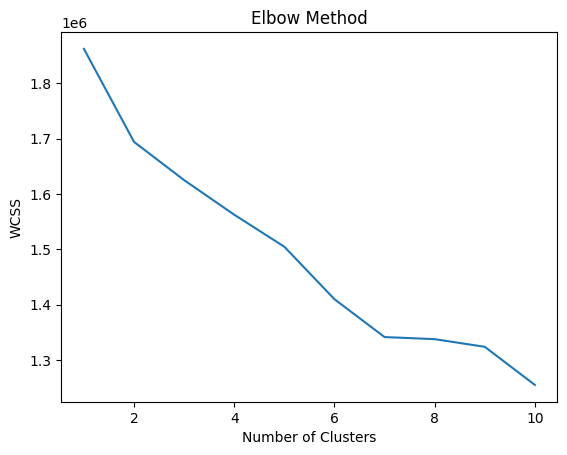

         sex_dummy  race_dummy  born_dummy  parborn_dummy  disblty_dummy  \
cluster                                                                    
0         0.492756    0.830103    0.872374       0.790530       0.012637   
1         0.453984    0.778894    0.878966       0.799569       0.010983   
2         0.378217    0.771503    0.576682       0.499973       0.002176   

         gender1_dummy  relig_dummy  relig16_dummy  health_dummy  age__25-34  \
cluster                                                                        
0             0.662778     0.014644       0.007934      0.238978    0.218407   
1             0.604810     0.020675       0.009763      0.227064    0.248887   
2             0.394483     0.006528       0.003971      0.185246    0.198303   

         ...  physhlth_encoded  mntlhlth_encoded  rincome_encoded  \
cluster  ...                                                        
0        ...          0.631127          0.876052        10.462542   
1        ..

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and you've already preprocessed it
X = df_cluster.drop('happy_encoded', axis=1)  # Features for clustering

# ----> Impute mean for missing values in X before scaling <----
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----> Remove or replace NaN values in X_scaled <----
# Option 1: Remove rows with NaN values
# X_scaled = X_scaled[~np.isnan(X_scaled).any(axis=1)]

# Option 2: Replace NaN values with a specific value (e.g., 0)
X_scaled = np.nan_to_num(X_scaled)

# Determine the optimal number of clusters (e.g., using the elbow method)
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters based on the elbow curve (e.g., 3)
optimal_clusters = 3  # Adjust based on the elbow curve

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to your DataFrame
df['cluster'] = clusters

# Analyze the clusters (e.g., by examining the characteristics of data points in each cluster)
print(df.groupby('cluster').mean())  # Example: Get the mean values of features for each cluster

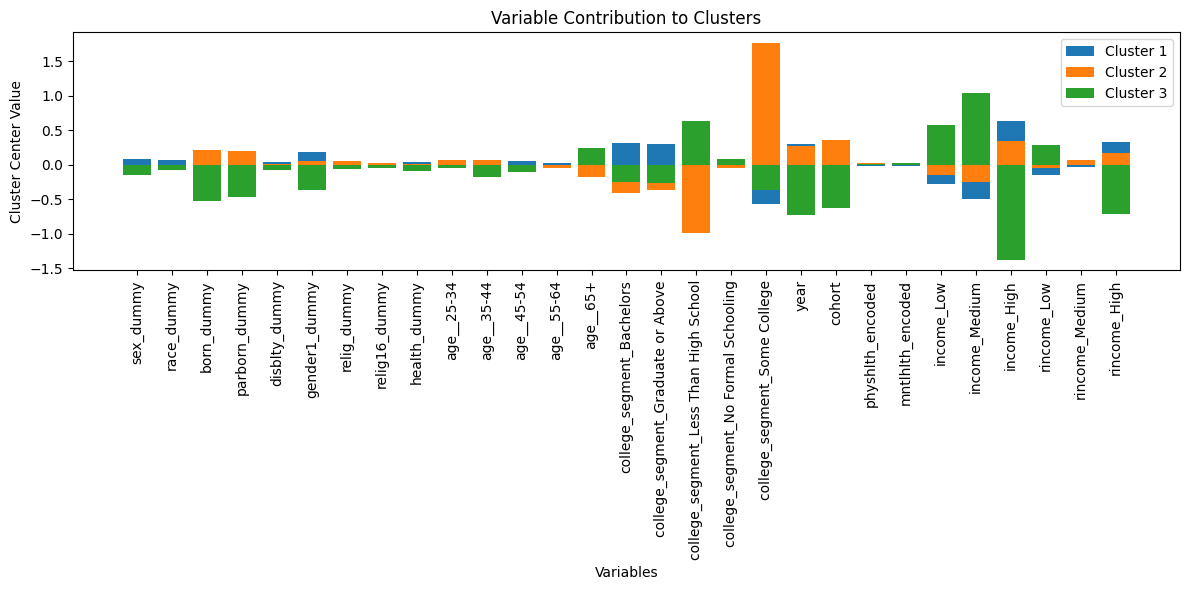

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# ----> Ensure that X.columns matches the shape of cluster_centers <----
# Get the columns used during clustering (from X_scaled)
cluster_columns = X.columns  # Assuming X_scaled was derived from X

# Create a DataFrame from cluster centers using the correct columns
cluster_centers_df = pd.DataFrame(cluster_centers, columns=cluster_columns)


# ----> Plotting Cluster Centers <----
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
for i, cluster in enumerate(cluster_centers_df.index):
    plt.bar(cluster_centers_df.columns, cluster_centers_df.loc[cluster], label=f"Cluster {i + 1}")

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Variables")
plt.ylabel("Cluster Center Value")
plt.title("Variable Contribution to Clusters")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# ----> Visualize Component Loadings (Optional) <----
plt.figure(figsize=(12, 6))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ['PC1', 'PC2', 'PC3'])
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.title("Component Loadings")
plt.show()

NameError: name 'pca' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code for clustering) ...

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame from cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)

# Add a cluster label column
cluster_centers_df['cluster_label'] = range(kmeans.n_clusters)

# Save to Excel
cluster_centers_df.to_excel("cluster_coefficients.xlsx", index=False)
print("Cluster coefficients saved to cluster_coefficients.xlsx")

Cluster coefficients saved to cluster_coefficients.xlsx


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code for clustering) ...

# Add the cluster labels to your DataFrame
df['cluster'] = clusters

# ----> Distribution of clusters within happy_encoded levels <----
for happy_level in [1, 2, 3]:
    print(f"\nHappy Encoded Level: {happy_level}")
    cluster_distribution = df[df['happy_encoded'] == happy_level]['cluster'].value_counts(normalize=True) * 100
    print(cluster_distribution)


Happy Encoded Level: 1
cluster
0    53.612287
2    24.569859
1    21.817854
Name: proportion, dtype: float64

Happy Encoded Level: 2
cluster
0    49.464339
2    28.398935
1    22.136727
Name: proportion, dtype: float64

Happy Encoded Level: 3
cluster
2    40.565233
0    39.870873
1    19.563893
Name: proportion, dtype: float64


In [ ]:
#want to download the clusters
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code for clustering) ...

# Add the cluster labels to your DataFrame
df['cluster'] = clusters

# ----> Download clusters as CSV files <----
for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]
    filename = f"cluster_{cluster_label}.csv"
    cluster_data.to_csv(filename, index=False)
    print(f"Cluster {cluster_label} saved to {filename}")

###PCA

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer # Import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D #Import for 3D plotting

# Assuming 'df' is your DataFrame and you've already preprocessed it
X = df.drop('happy_encoded', axis=1)

# ----> Impute mean for missing values in X before scaling <----
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the features
x = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)  # Choose the number of components (e.g., 2 for visualization)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2','principal component 3'])

# ----> Concatenate with original DataFrame <----
finalDf = pd.concat([principalDf, df[['happy_encoded']]], axis=1)

# Visualize the results
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d') #projection='3d' is added
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15) #z label added
ax.set_title('3 component PCA', fontsize=20) #changed to 3 component
targets = [1, 2, 3]  # Assuming 'happy_encoded' has values 1, 2, 3
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['happy_encoded'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3'],
               c=color, s=50)
ax.legend(targets)
ax.grid()
plt.show()

# ----> Explained Variance Ratio <----
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D

# ... (your existing code for data preprocessing and PCA) ...

# ----> Get Component Loadings <----
component_loadings = pd.DataFrame(pca.components_.T,
                                  columns=['PC1', 'PC2', 'PC3'],
                                  index=X.columns)

# ----> Print Component Loadings <----
print("\nComponent Loadings:")
print(component_loadings)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D

# ... (your existing code for data preprocessing and PCA) ...

# ... (your existing code to create the 3D scatter plot) ...

# ----> Save the plot <----
plt.savefig("pca_plot.png")  # Save as PNG (you can change the format and filename)
print("PCA plot saved to pca_plot.png")

# ... (rest of your code for explained variance and component loadings) ...

In [ ]:
#want to download Component Loadings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D

# ----> Get Component Loadings <----
component_loadings = pd.DataFrame(pca.components_.T,
                                  columns=['PC1', 'PC2', 'PC3'],
                                  index=X.columns)

# ----> Save Component Loadings to CSV <----
component_loadings.to_csv("component_loadings.csv")
print("Component loadings saved to component_loadings.csv")

